In [1]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assests = ['DMART.NS','^NSEI']
pf_data = pd.DataFrame()

for a in assests:
    pf_data[a] = wb.DataReader(a,data_source= 'yahoo', start= '2011-1-1')['Adj Close']

In [3]:
pf_data.tail()

,DMART.NS,^NSEI
Date,,
2021-04-30,2852.899902,14631.099609
2021-05-03,2898.649902,14634.150391
2021-05-04,2858.399902,14496.500000
2021-05-05,2874.399902,14617.849609
2021-05-06,2878.149902,14724.799805


<AxesSubplot:xlabel='Date'>

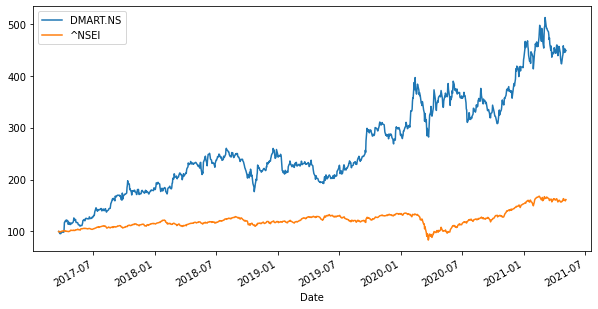

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,5))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() * 250

DMART.NS    0.369325
^NSEI       0.119568
dtype: float64

In [7]:
log_returns.cov() * 250

,DMART.NS,^NSEI
DMART.NS,0.122462,0.028312
^NSEI,0.028312,0.038330


In [8]:
log_returns.corr()

,DMART.NS,^NSEI
DMART.NS,1.00000,0.41294
^NSEI,0.41294,1.00000


In [9]:
num_assets = len(assests)

In [10]:
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.49810609, 0.41401835])

In [12]:
arr[0] + arr[1] 

0.9121244365140806

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.79675918, 0.20324082])

In [17]:
weights [0] + weights [1]

1.0000000000000002

Expected Portfolio return


In [18]:
np.sum(weights * log_returns.mean()) * 250

0.3185644471205235

Expected Portfolio Variance


In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)) 

0.08849456669001592

Expected Portfolio Volatility

In [20]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.29748036353684915

In [27]:
pfolio_returns = []
pfolio_volatility = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatility.append(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatility = np.array(pfolio_volatility)

pfolio_returns, pfolio_volatility


387,
        0.23671333, 0.19638041, 0.22590924, 0.30758139, 0.2314021 ,
        0.26066763, 0.18646032, 0.27962285, 0.25253501, 0.16078921,
        0.36155784, 0.34278   , 0.32750668, 0.25661811, 0.30677347,
        0.23319038, 0.3631377 , 0.24988455, 0.27503206, 0.17661799,
        0.26426126, 0.34766857, 0.27503276, 0.29837117, 0.20333518,
        0.35156783, 0.22856366, 0.21549309, 0.25627084, 0.33053483,
        0.21487852, 0.25542701, 0.28704584, 0.18216742, 0.33493586,
        0.20623195, 0.12114939, 0.24889824, 0.29509111, 0.31140361,
        0.21332646, 0.17271709, 0.34672449, 0.25203961, 0.25952466,
        0.13155685, 0.26040026, 0.32575177, 0.29346817, 0.21909368,
        0.24112989, 0.33996576, 0.23143883, 0.24353799, 0.3056854 ,
        0.20632952, 0.2670211 , 0.12254658, 0.30185949, 0.15287191,
        0.27155145, 0.19634501, 0.17523906, 0.31073072, 0.17804746,
        0.15251117, 0.19035378, 0.21201265, 0.26003168, 0.16221133,
        0.26885122, 0.30576181, 0.24818483,

In [28]:
portfolios = pd.DataFrame({'Return' : pfolio_returns, 'Volatility': pfolio_volatility})

In [29]:
portfolios.head()

,Return,Volatility
0,0.215838,0.046084
1,0.248896,0.055886
2,0.315777,0.086879
3,0.357313,0.113647
4,0.220877,0.047342


In [30]:
portfolios.tail()

,Return,Volatility
995,0.326226,0.093070
996,0.127179,0.037816
997,0.144830,0.037369
998,0.174896,0.039003
999,0.239084,0.052596


Text(0, 0.5, 'Expected Return')

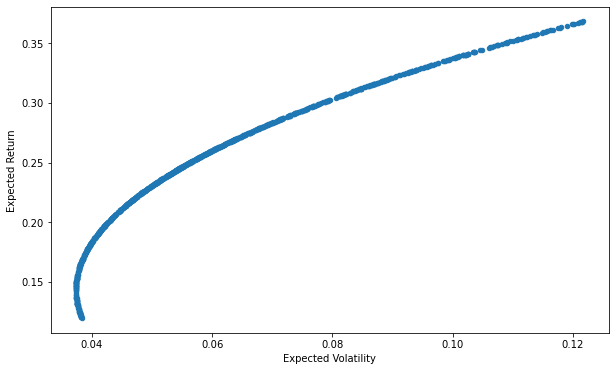

In [31]:
portfolios.plot(x= 'Volatility', y= 'Return', kind = 'scatter', figsize = (10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return') 